# Excavator use-case 7: cost and makespan optimization

Solver type:
	-> Builtin z3 z3.Optimize solver - 'pareto' mode.
Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.03s
MinimizeMakeSpan Value :  3
MinimizeResourceCostSmallExcavatorMediumExcavator Value :  45


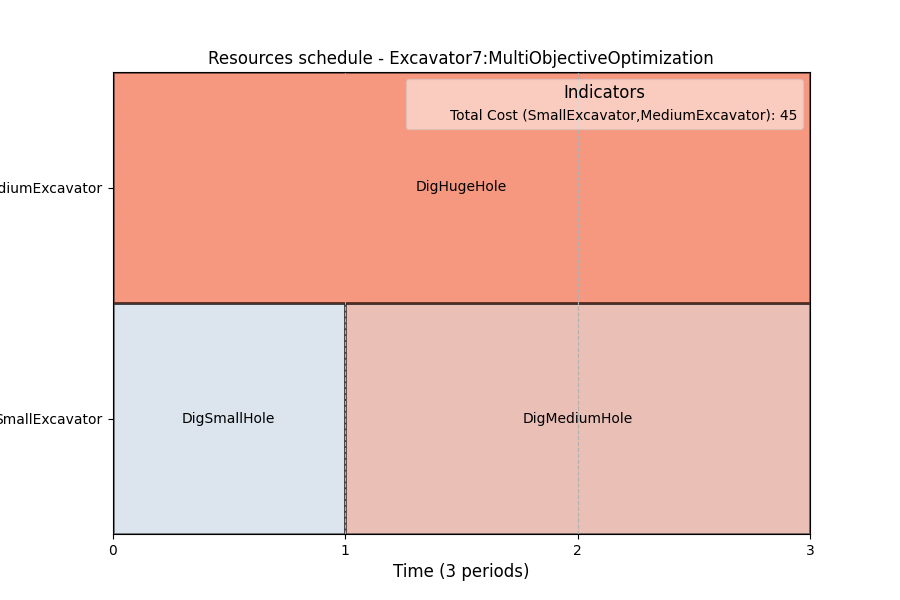

In [2]:
%matplotlib widget
import processscheduler as ps

problem = ps.SchedulingProblem(name="Excavator7:MultiObjectiveOptimization")

# three tasks
dig_small_hole = ps.VariableDurationTask(name="DigSmallHole", work_amount=3)
dig_medium_hole = ps.VariableDurationTask(name="DigMediumHole", work_amount=7)
dig_huge_hole = ps.VariableDurationTask(name="DigHugeHole", work_amount=15)

# two workers
small_exc = ps.Worker(
    name="SmallExcavator", productivity=4, cost=ps.ConstantFunction(value=5)
)
medium_ex = ps.Worker(
    name="MediumExcavator", productivity=6, cost=ps.ConstantFunction(value=10)
)

dig_small_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_medium_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)
dig_huge_hole.add_required_resource(
    ps.SelectWorkers(list_of_workers=[small_exc, medium_ex], nb_workers_to_select=1, kind="min")
)

ps.ObjectiveMinimizeMakespan()

ps.ObjectiveMinimizeResourceCost(list_of_resources=[small_exc, medium_ex])

solver = ps.SchedulingSolver(problem=problem, optimizer="optimize", optimize_priority="pareto")
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.03s
MinimizeMakeSpan Value :  6
MinimizeResourceCostSmallExcavatorMediumExcavator Value :  40


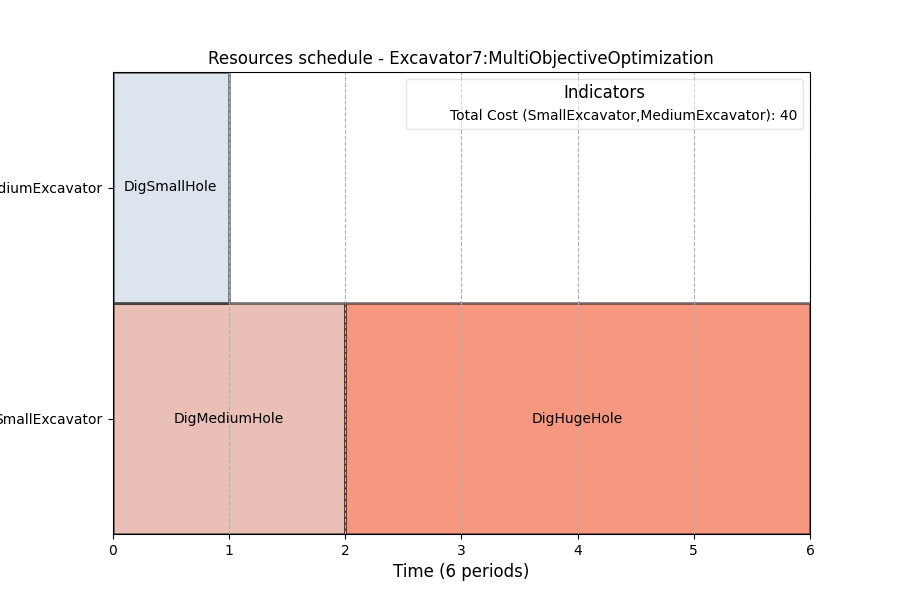

In [3]:
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.01s
MinimizeMakeSpan Value :  7
MinimizeResourceCostSmallExcavatorMediumExcavator Value :  35


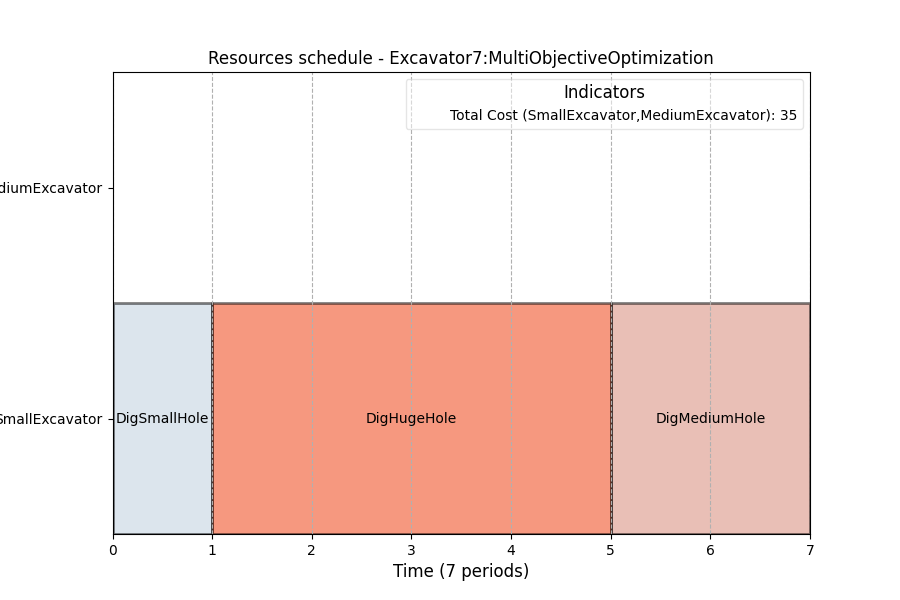

In [4]:
solution = solver.solve()
ps.render_gantt_matplotlib(solution)

In [5]:
solution = solver.solve()
print(solution)

	No solution can be found for problem Excavator7:MultiObjectiveOptimization.
	Reason: Unsatisfiable problem: no solution exists
Total computation time:
	Excavator7:MultiObjectiveOptimization satisfiability checked in 0.03s
False
